In [7]:
%load_ext autoreload
%autoreload 2
%pdb

import sys
from pathlib import Path

# Add the project root to the Python path
project_root = Path.cwd()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.data import BalancedParenthesesDataset, CopyDataset, KBitFlipFlopDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


((10, 100, 3), (10, 100, 3))

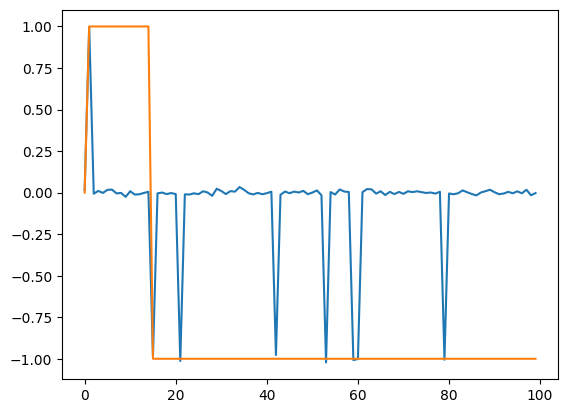

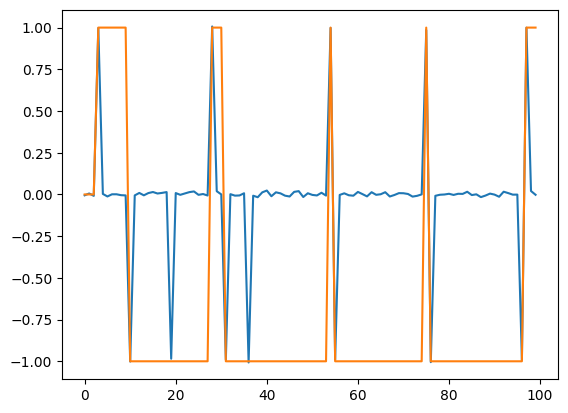

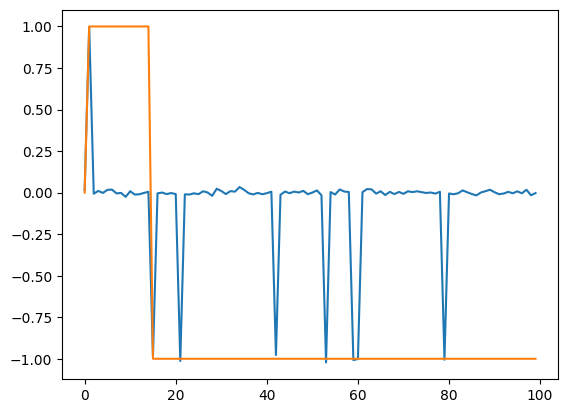

In [17]:
import matplotlib.pyplot as plt
import numpy as np

kbit = KBitFlipFlopDataset(k=3,batch_size=10,seq_length=100,p=0.1,noise_std=0.01)
inputs,targets = kbit()
for i in range(3):
    plt.figure()
    batch_ind = np.random.randint(len(inputs))
    dim_ind = np.random.randint(inputs.shape[-1])
    plt.plot(inputs[batch_ind,:,dim_ind])
    plt.plot(targets[batch_ind,:,dim_ind])
inputs.shape, targets.shape

In [ ]:
from typing import Any


bparenth = BalancedParenthesesDataset(tokens=[(1,2),(3,4)],batch_size=3)
inputs,targets,masks = bparenth()


((1, 37), (1, 37), (1, 37))

In [26]:
def check_balanced_parentheses(sequence, token_map):
    """
    Check if a sequence of parentheses is balanced.
    Returns 1 if balanced, -1 if not.
    """
    # Map tokens to their types
    open_tokens = {1: '{', 3: '('}
    close_tokens = {2: '}', 4: ')'}
    matching = {'{': '}', '(': ')'}
    
    stack = []
    for token in sequence:
        token = int(token)
        if token in open_tokens:
            # Opening parenthesis
            stack.append(open_tokens[token])
        elif token in close_tokens:
            # Closing parenthesis
            if not stack:
                return -1  # No matching open
            expected_close = matching[stack[-1]]
            if close_tokens[token] != expected_close:
                return -1  # Mismatched
            stack.pop()
        # Ignore other tokens (like pad tokens)
    
    # Check if all opened parentheses were closed
    return 1 if len(stack) == 0 else -1

inputs,targets,masks = bparenth()
# Convert tokens: 1->{, 2->}, 3->(, 4->)
token_map = {1: '{', 2: '}', 3: '(', 4: ')'}
readable_input = ''.join([token_map.get(int(x), str(x)) for x in inputs[0]])
print(readable_input)
print(f"Target label: {targets[0][-1]}")
print(f"Computed balance: {check_balanced_parentheses(inputs[0], token_map)}")

KeyboardInterrupt: 

In [22]:
copy = CopyDataset(seq_length_min=10,seq_length_max=15,lag_min =15, lag_max=100, batch_size=13,num_classes=10)
inputs, targets = copy()

> /Users/mitchellostrow/Desktop/Projects/SLT/9520_recurrent_networks/src/data/copy_dataset.py(56)make_sample()
     54         def make_sample(i, carry):
     55             import pdb; pdb.set_trace()
---> 56             inp, tgt = carry
     57             seq = init_seq[i]
     58             # Write sequence to input

Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=1/0)>
*** NameError: name 'self' is not defined
(Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=1/0)>, (Traced<ShapedArray(int32[13,73])>with<DynamicJaxprTrace(level=1/0)>, Traced<ShapedArray(int32[13,73])>with<DynamicJaxprTrace(level=1/0)>))
> /Users/mitchellostrow/Desktop/Projects/SLT/9520_recurrent_networks/src/data/copy_dataset.py(57)make_sample()
     55             import pdb; pdb.set_trace()
     56             inp, tgt = carry
---> 57             seq = init_seq[i]
     58             # Write sequence to input
     59             inp = inp.at[i, :seq_length].set(s